Computational Take on Statistics: Permutation Testing
========

In [1]:
reset -fs

Is a drug effective or not?
-----

In [2]:
drug    = [54, 73, 53, 70, 73, 68, 52, 65, 65]
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]

In [7]:
from statistics import mean

observed_diff = mean(drug) - mean(placebo)
print(f"{observed_diff:,.2f}")

12.97


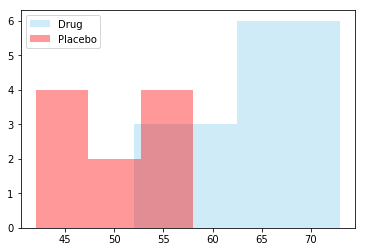

In [10]:
import matplotlib.pylab as plt
import seaborn as sns

palette = "Dark2"
%matplotlib inline

sns.distplot(drug, color="skyblue", label="Drug", kde=False);
sns.distplot(placebo, color="red", label="Placebo", kde=False);
plt.legend();

What would look if there were no difference in the groups?
---------

It is the same if the labels were shuffled (with the same data).

In [12]:
combined = drug + placebo

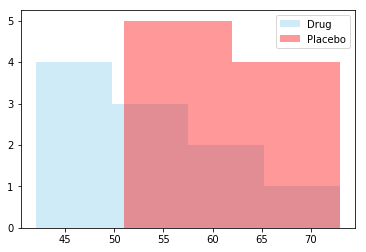

In [22]:
from random import shuffle

shuffle(combined)
drug_random = combined[len(drug):]
placebo_random = combined[:len(drug)]

sns.distplot(drug_random, color="skyblue", label="Drug", kde=False);
sns.distplot(placebo_random, color="red", label="Placebo", kde=False);
plt.legend();

In [82]:


n = 10_000
count = 0
combined = drug + placebo
for i in range(n):
    shuffle(combined)
    new_diff = mean(combined[:len(drug)]) - mean(combined[len(drug):])
    count += (new_diff >= observed_diff)

In [83]:
print(f"""{n:,} label reshufflings produced only {count} instances with a difference
at least as extreme as the observed difference of {observed_diff:.1f}.""")

10,000 label reshufflings produced only 12 instances with a difference
at least as extreme as the observed difference of 13.0.


What is the p-values?

In [84]:
count / n

0.0012

What should we do?

Reject the null hypothesis that there is no difference between the drug and the placebo.""")

 The only hard part is deciding whether to do a one-sided test or a two-sided test.  It depends on what hypothesis you are testing.  If you think men are taller than women, or that the new drug is better than the old drug, then a one-sided test is appropriate.  If you think there is a difference between the groups but you don't know what it is, you can use a two-sided test; that is, use the absolute value of the difference as the test statistic.

This decision can seem arbitrary, but don't worry.  The effect on the p-value is just a factor of two, and (as I argued last time) we only care about the order of magnitude.  Whether the p-value is 2% or 4% or 8% doesn't really matter.

Any Questions?
-----

<br>
<br> 
<br>

Analytical vs Computational Hypothesis Testing
----

Steps for Analytical Hypothesis Testing
-----

1. Setup testing framework
    1. Create null and alternative hypothesis
    1. Set α
1. Collect data
1. Pick and calculate t-statistic
1. Calculate p-value
1. Draw conclusion

Steps for Computational Hypothesis Testing
-----

1. Setup testing framework
    1. Create null and alternative hypothesis
    1. Set α
1. Collect data
1. __Iterate while shuffling data__ to simulate null effect
1. Calculate p-value 
1. Draw conclusion

Comparing Analytical vs Computational Hypothesis
--------

__Almost all of the steps are the same.___

The only difference is:

- Analytical method uses domain and theoretical knowledge to pick the test statistic.
- Computational method uses fundamental computing (looping and random number generator) to simulate null effect.

Advantages of Computational Approach
-----

1) Analysis often dictates the test statistic; simulation lets you choose whatever test statistic is most appropriate.

2) Analytic methods are inflexible.  If you have issues like censored data, non-independence, and long-tailed distributions, you won't find an off-the-shelf test; and unless you are a mathematical statistician, you won't be able to make one.  With simulation, these kinds of issues are easy.

3) When people think of analytic methods as black boxes, they often fixate on finding the right test and figuring out how to apply it, instead of thinking carefully about the problem.

<br>
<br> 
<br>

Linear Regression Example
-----

In [96]:
x = [95, 85, 80, 70, 60]
y = [85, 95, 70, 65, 70]

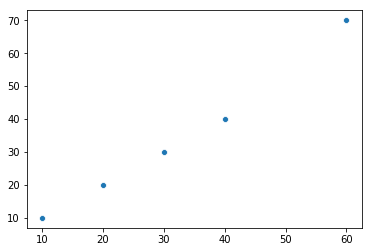

In [97]:
sns.scatterplot(x=x, y=y);

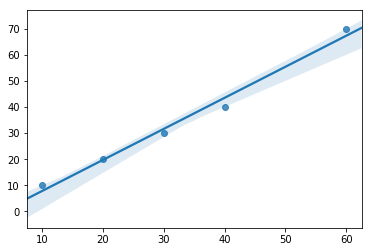

In [98]:
sns.regplot(x=x, y=y);

Estimate slope from points
------

$$slope = \frac{\sum_{i=1}^n (x_i- \bar x)(y_i- \bar y)}{\sum_{i=1}^n(x_i- \bar x)^2}$$

In [105]:
def slope(x, y):
    "Caculate the estimate the slope between x and y using least square method."
    x_mean = mean(x)
    y_mean = mean(y)
    numerator = sum((x[i]-x_mean)*(y[i]-y_mean) for i in range(len(x)))
    denominator = sum((x[i]-x_mean)**2 for i in range(len(x)))
    return  numerator/ denominator

In [106]:
observed_slope = slope(x, y)
print(f"{observed_slope:,.4f}")

-0.0270


In [101]:
n = 10_000

count = 0
for i in range(n):
    shuffle(y)
    new_slope = slope(x, y)
    count += (new_slope >= observed_slope)

In [102]:
print(f"""{n:,} label reshufflings produced only {count:,} instances with a difference
at least as extreme as the observed difference of {observed_slope:.1f}.""")

10,000 label reshufflings produced only 87 instances with a difference
at least as extreme as the observed difference of 1.2.


In [103]:
count / n

0.0087

What should we do?

Conclude there is not significatn linear relationship between these variables

<br>
<br> 
<br>

The only question: "Is the apparent effect real, or is it due to chance?" 
--------

Thus, there is only one test in all hypothesis testing!
-----

Your turn, fair or loaded dice

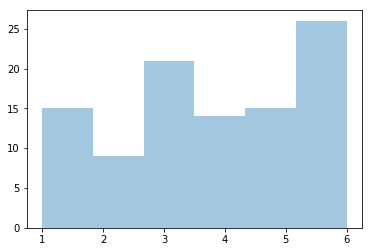

In [135]:
# TODO: Delete behand
# Create data 
from random import choices
# Six roulette wheel spins (weighted sampling with replacement)
data = choices(population=list(range(1, 7)),
        weights=[.155, .155, .155, .155, .155, .225], 
        k=100)
sns.distplot(data, bins=6, kde=False);

In [121]:
# Test just for number of 6s
n = 10_000

count = 0

count = 0
for i in range(n):
    shuffle(data)
    Counter(data)
    count += (new_slope >= observed_slope)

In [ ]:
# Test all numbers are equal

Bonus Material
-----

Simulation of arrival times and service deliveries in a single server queue:

In [ ]:
from random import expovariate, gauss
from statistics import mean, median, stdev

In [ ]:


average_arrival_interval = 5.6
average_service_time = 5.0
stdev_service_time = 0.5

num_waiting = 0
arrivals = []
starts = []
arrival = service_end = 0.0
for i in range(20000):
    if arrival <= service_end:
        num_waiting += 1
        arrival += expovariate(1.0 / average_arrival_interval)
        arrivals.append(arrival)
    else:
        num_waiting -= 1
        service_start = service_end if num_waiting else arrival
        service_time = gauss(average_service_time, stdev_service_time)
        service_end = service_start + service_time
        starts.append(service_start)

waits = [start - arrival for arrival, start in zip(arrivals, starts)]
print(f'Mean wait: {mean(waits):.1f}.  Stdev wait: {stdev(waits):.1f}.')
print(f'Median wait: {median(waits):.1f}.  Max wait: {max(waits):.1f}.')

Resources
-------

- "[Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o)" by John Rauser
- "[Statistics is Easy](https://www.amazon.com/Statistics-Second-Synthesis-Lectures-Mathematics/dp/160845570X)" by Dennis Shasha and Manda Wilson
- [Raymond Hettinger's Modern Python course](https://github.com/rhettinger/modernpython/blob/master/resampling.py)
- https://stattrek.com/regression/regression-example.aspx
- http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html

<br>
<br> 
<br>

----